
**MAKING DIRECT COMPARISONS BETWEEN DIFFERENT STATISTICAL MODELS**



Learning Objectives 
*  Appreciating how design and analysis go hand in hand.
*  Complete a full analysis of the data including testing for parametric  assumptions.
*  Appreciate the difference in the way data are entered when different  designs are used.
*  Appreciate the difference in power between parametric and nonparametric tests.
*  Appreciate the difference in power between a between-groups  design and a repeated measures design.
*  Identify the essential components from Python output generated from a mixed factorial analysis.

Today’s class involves applying different statistical models to the same data set, and  therefore tries to get you thinking about the implications of using the different  statistical techniques that we have covered in the recent classes. The designs that  we will consider are: 

**Between-groups design**
*   Between-groups one-way ANOVA including the test for homogeneity of  variance and normality.
*   Repeat the analysis as if it were a nonparametric analysis.

**Repeated measures design**
*   Repeated measures one-way ANOVA including tests for normality.
*   Repeat the analysis as if it were a nonparametric analysis.

**Mixed factorial design**
 

**Experiment**

Researchers were interested to determine whether the materials used to produce a  picture (IV = Material) would affect the ratings given by a panel of judges for artistic  merit. A between-groups design was used such that each participant was randomly  placed in one of the three experimental groups: crayon, marker, or felt-tip pen. 

Table  0.1 below shows the hypothetical data gathered for this research. 

In [ ]:
# We will use Pingouin today, so let's install it

!pip install Pingouin

     |████████████████████████████████| 182 kB 7.7 MB/s 
     |████████████████████████████████| 38.2 MB 1.3 MB/s 
     |████████████████████████████████| 9.8 MB 41.8 MB/s 
  Created wheel for Pingouin: filename=pingouin-0.5.0-py3-none-any.whl size=193661 sha256=1fd810c8e24e3688b3a4a79daf6712015877fae56907670a9616f36992b42640
  Stored in directory: /root/.cache/pip/wheels/14/46/f9/cedd81d68d2515c24bbbd000d5b347e4fe092ccc4b568f7f70
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=4ce0da0a8ad5d0662710b3d50cb4ec7512a08c01d2742272f04646449b4106ac
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built Pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsm

Import data as a dataframe.


In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/chiaracc/SAMII/main/SAM_II_Lab5.txt') # Read in the data, the first column is the participant code, the first line is the name of the columns
print('Table 0.1')
df# This shows the data in a neat table

# NOTE: having all the data in a single column will make things easier with Python.



Table 0.1


,score,material
0,12,crayon
1,20,crayon
2,21,crayon
3,14,crayon
4,21,crayon
5,26,crayon
6,20,crayon
7,24,crayon
8,19,crayon
9,24,crayon


**Tests for normality **


Run the code below to test the assumption of normality.


             NORMALITY PLOT FOR CRAYON


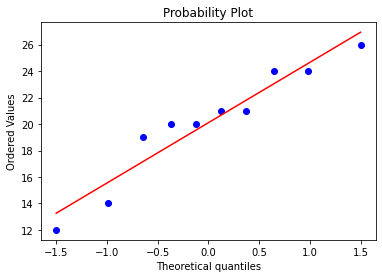


             NORMALITY PLOT FOR PAINT


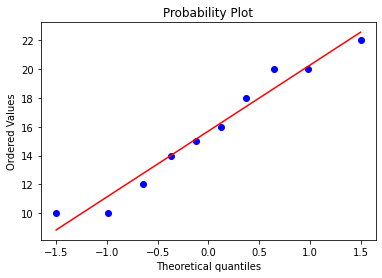


           NORMALITY PLOT FOR FELT-TIP 


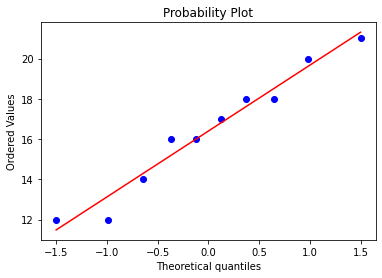


 
 
 Shapiro-Wilk test for normality 



,W,pval,normal
score,1.2,0.549,True


In [ ]:
import pylab
import scipy.stats as stats
import pingouin as pg

# Create a new dataframe containing only one group
a = df.loc[df['material'] == 'crayon']
b = df.loc[df['material'] == 'paint']
c = df.loc[df['material'] == 'felt-tip']

# Plot each group using a stem-leaf plot
print('\n             NORMALITY PLOT FOR CRAYON')
stats.probplot(a['score'], dist = "norm", plot = pylab)
pylab.show()
print('\n             NORMALITY PLOT FOR PAINT')
stats.probplot(b['score'], dist = "norm", plot = pylab)
pylab.show()
print('\n           NORMALITY PLOT FOR FELT-TIP ')
stats.probplot(c['score'], dist = "norm", plot = pylab)
pylab.show()


# Run a normality test
print('\n \n \n Shapiro-Wilk test for normality \n')
pg.normality(df, method='normaltest').round(3) # Use Pingouin to test normality (using Shapiro-Wilk test), if p>0.05 data is normally distributed



In [ ]:
# Your answer


We will now perform a homogeneity tests. We will use Levene's test (significant result means that the assumption is violated) and thus determine whether the groups are suitably  similar in their variance to comply with the homogeneity of variance assumption. 




In [ ]:
# Levene's test
from scipy.stats import levene
import numpy as np

stat, p = levene(a['score'], b['score'], c['score'])
print('stat               p')
print(stat, p)



stat               p
0.5760495526496904 0.5688729057515888


**Q1** What does this result mean?

In [ ]:
Assumptions were not violated



Now let's perform the appropriate ANOVA analysis to determine whether there is a main effect  of material. 

In [ ]:
# Run ANOVA test
pg.anova(data=df, dv="score", between="material", detailed=True, effsize='n2')
# n2 is eta squared

,Source,SS,DF,MS,F,p-unc,n2
0,material,111.8,2,55.900000,3.598712,0.041162,0.210467
1,Within,419.4,27,15.533333,NaN,NaN,NaN


**Q2a.** Is there a main effect of Material? Write out the numeric expression of your result.
Record also the MSerror, since you will require this later. 

In [ ]:
F(2,27)=3.599, p<.05(.041), np2 = .210

**Q2b. What is the value for partial eta squared, the estimated effect size?**

You will not have covered this concept in lectures yet, but it will be useful for  you to know how to calculate it once you have. Note partial eta squared is reported  as 'η2p=__'  

In [ ]:
SSBetween/SSTotal

**Nonparametric equivalent**

Just as are there non-parametric equivalents of t-tests so there are non-parametric  equivalents of ANOVAs. However, they are limited in number. There is no non-parametric equivalent of a factorial ANOVA. This is a major limitation and is one of  the reasons that factorial ANOVAs are carried out even when the properties of the  data (normality and homogeneity of variance etc.) suggest they should not be used. 


**Q3a** If you were to carry out the nonparametric equivalent of a between-groups ANOVA, would the probability of finding a significant result increase or  decrease? Explain your result with reference to what you know about the  differences in power between parametric and nonparametric statistics.


In [ ]:
can not trust, false positives

MSE = 15.533

**Q3b.** Carry out the Kruskal-Wallis test (non-parametric equivalent a between groups  ANOVA) and write out the result in the appropriate fashion? How does this  result compare to the one in 2b above?


An example (note the results quoted are not the ones for the analysis here) description would look like this: 

*'After ranking the individual scores, a Kruskal-Wallis was used to evaluate 
differences among the three treatments. The outcome of the test indicated 
 no significant differences among the treatment conditions, X2 = 3.785 (2,  N=15), p>.05'*

Note the interpretation of a significant result here would be similar to that for a  standard ANOVA. The difference is that here the interpretation would be that the  proportion of high and low ranks across the three levels of the IV would be different to that expected on the basis of chance. 

In [ ]:
# Run a Kruskal-Wallis test

pg.kruskal(data=df, dv="score", between="material", detailed=True)

,Source,ddof1,H,p-unc
Kruskal,material,2,5.88282,0.052791


In [ ]:
non-parametrric more conservative

**Repeated measures design**


The data above in Table 0.1 could now be used as if it came from a repeated  measures design i.e. each participant performed all levels of the IV. The new table of  data might look something like Table 0.2 below. 
Table 0.2 Average rating given to each participant according to each level of the IV 


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/chiaracc/SAMII/main/SAM_II_Lab5v2.txt') # Read in the data, the first column is the participant code, the first line is the name of the columns
df.drop(['sex'], axis=1, inplace=True) # Drop the last column
print('Table 0.2')
df



Table 0.2


,score,material,participant
0,12,crayon,participant 1
1,20,crayon,participant 2
2,21,crayon,participant 3
3,14,crayon,participant 4
4,21,crayon,participant 5
5,26,crayon,participant 6
6,20,crayon,participant 7
7,24,crayon,participant 8
8,19,crayon,participant 9
9,24,crayon,participant 10


**Q4.** How has the fact that the data now come from a repeated measures design  changed the way in the data are organized

Since  you have already assessed the normality of these data there is no need to do so  again. If, however you were encountering it for the first time then you should do so.

In [ ]:
# Your answer

**Q5a.** With the same data set, which type of ANOVA, repeated or between, is more  powerful and why? Should the result from the repeated measures analysis be  more, or less significant?

The answer lies with the fact that the error terms in each case are calculated in  different ways. 


In [ ]:
Individual error removed - MS error (goes down), F(goes up), p val (goes down), power (goes up)

Let's perform a repeated measures ANOVA .

In [ ]:
# Run repeated measures ANOVA test
aov = pg.rm_anova(dv="score", within="material", subject="participant", correction=True, detailed=True, data=df)

#correctionstring or boolean
#If True, also return the Greenhouse-Geisser corrected p-value.
#The default for one-way design is to compute Mauchly’s test of sphericity to determine whether the p-values needs to be corrected (see pingouin.sphericity()).
#The default for two-way design is to return both the uncorrected and Greenhouse-Geisser corrected p-values. Note that sphericity test for two-way design are not currently implemented in Pingouin.
# Greenhouse-Geisser epsilon factor (= index of sphericity)

print(aov)


     Source          SS  DF         MS  ...       eps  sphericity   W-spher   p-spher
0  material  111.800000   2  55.900000  ...  0.958343        True  0.956532  0.837141
1     Error   66.866667  18   3.714815  ...       NaN         NaN       NaN       NaN

[2 rows x 12 columns]


Making sense of the output 
'Mauchly’s Test of Sphericity' is a special test required for a repeated measure  ANOVA which tests to see whether there are equal correlations among the different  combinations of levels of the IV. Greenhouse-Geisser, Huynh-Feldt and the lower-bound are such  examples of more conservative ANOVAs. Pinuoin automatically returns the corrected (more conservative) p value is the sphericity assumption is violated. 

**Q5b.** Using a repeated measures design is there a main effect of material? Write out  the numerical components of the result. Identify whether your prediction in Q5a  regarding the significance of the result was correct or not.


In [ ]:
F=(2,18)=15.048, p=<.001, np2=.626

**Q5c** How does the MSerror here compare to the one you recorded in 2b above? How  would a change in MSerror impact of the F value produced and consequently  the power of the analysis?

In [ ]:
smaller MSe = larger F stat

**Nonparametric equivalent**

Carry out the Friedman test (non-parametric equivalent of repeated measures  ANOVA).   



In [ ]:
pg.friedman(data=df, dv="score", within="material", subject="participant", method="chisq")

,Source,W,ddof1,Q,p-unc
Friedman,material,0.562162,2,11.243243,0.003619


**Q6.** How does your result compare to the one given in 5b above and what should  this tell about the power of a non-parametric test relative to a parametric one?

In [ ]:
X2 = 11.243(2,N=30), p<.01(.004)

**Mixed Factorial design**


Add an additional column to your data that will identify whether it came from a male  or female. To compute a mixed factorial ANOVA complete the steps as for a  repeated measures, only this time move Sex into the Between-groups Factor(s) box. 
Making sense of the output 
The essential components that we are interested in are the 'Tests of Within-subjects'  and 'Tests of the Between-groups' effects. 



In [ ]:
# The data from Table 0.1 again could contribute to a different design, in this instance  a mixed factorial design. 
# Table 0.3 Average rating given to each participant according to gender and level of within subjects  variable 

df = pd.read_csv('https://raw.githubusercontent.com/chiaracc/SAMII/main/SAM_II_Lab5v2.txt') # Read in the data, the first column is the participant code, the first line is the name of the columns
print('Table 0.3')
df

Table 0.3


,score,material,sex,participant
0,12,crayon,male,participant 1
1,20,crayon,male,participant 2
2,21,crayon,female,participant 3
3,14,crayon,male,participant 4
4,21,crayon,female,participant 5
5,26,crayon,female,participant 6
6,20,crayon,female,participant 7
7,24,crayon,female,participant 8
8,19,crayon,male,participant 9
9,24,crayon,male,participant 10


In [ ]:
pg.mixed_anova(data=df, dv="score", within="material", subject="participant", between="sex", correction='auto', effsize='n2')

,Source,SS,DF1,DF2,MS,F,p-unc,n2,eps
0,sex,154.133333,1,8,154.133333,6.215054,0.037347,0.290161,NaN
1,material,111.800000,2,16,55.900000,13.634146,0.000350,0.210467,0.958343
2,Interaction,1.266667,2,16,0.633333,0.154472,0.858130,0.002385,NaN


**Q6.** Do the two variables produce significant main effects and is there a significant  interaction. Report the results in the appropriate numerical fashion.

In [ ]:
significant main effect but no significant interaction